ARBOLES DE DESICÓN - Red Wine Quality

Curso: Análisis de Datos

Est: Jainer Pabón Borja

In [44]:
#Librerias necesarias a utilizar
import pandas as pd #Se usa para el manejo y estructuras de datos
import numpy as np #Se usa para el cálculo númerico y el análisis de datos
import seaborn as sns #Se usa para la creación de gráficos estadísticos 
import matplotlib.pyplot as plt #Se usa para la creación de gráficos en dos dimensiones 

#Librerias para ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [46]:
#Lectura de los datos en python y se lo agregamos a la variable de Dataset
Dataset = pd.read_csv("winequality-red.csv")

In [48]:
#Análisis exploratorio
Dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [50]:
#Identificacion de cuantas filas y columnas hay
Dataset.shape

(1599, 12)

In [54]:
#Descripción de datos
Dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [56]:
#Verificación de valores nulos
Dataset.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

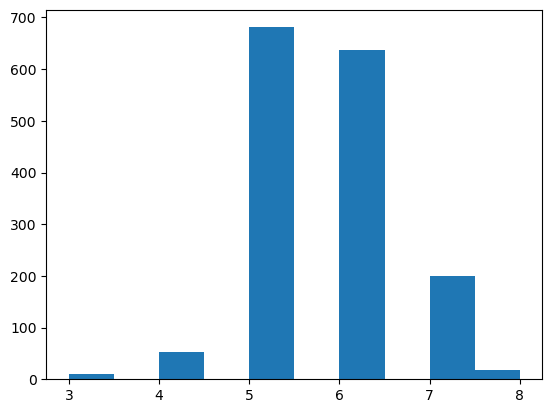

In [58]:
#Gráfica en histograma de la variable que considero es la variable objetivo
plt.hist(Dataset.quality)

<Axes: xlabel='alcohol', ylabel='volatile acidity'>

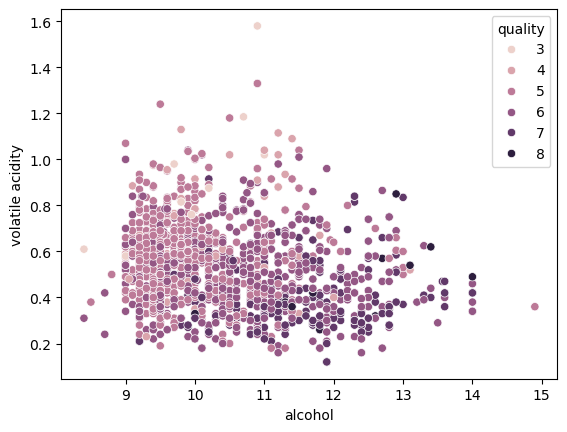

In [70]:
#Diagrama de dispercion para representar la calidad
sns.scatterplot(x = 'alcohol', y = "volatile acidity", hue = "quality", data = Dataset)

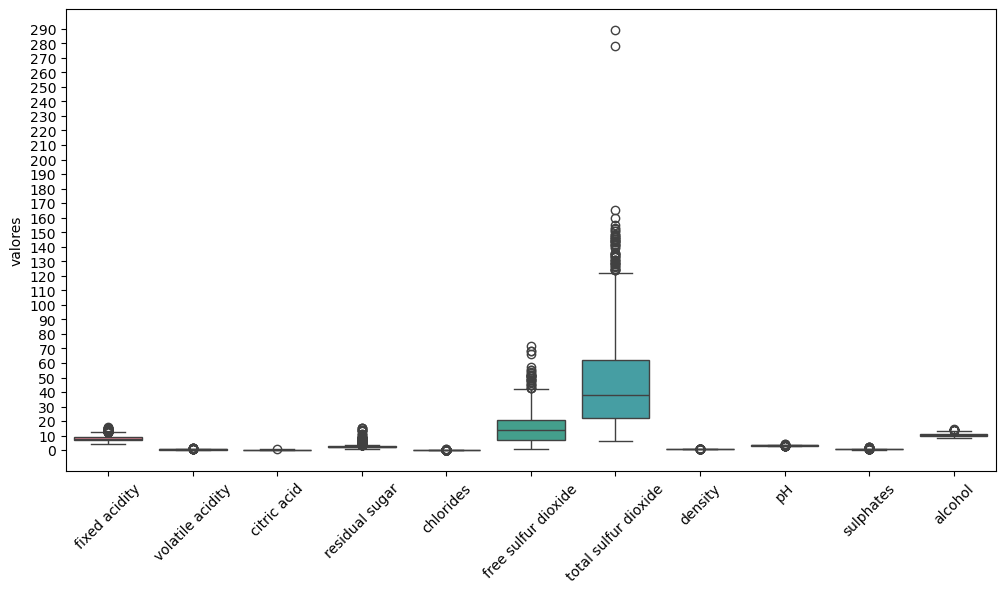

In [134]:
#Identificar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=Dataset[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                          "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]])
plt.xticks(rotation=45)
plt.yticks(range(0, 300, 10)) 
plt.ylabel("valores")
plt.show()

In [140]:
#Modelo de predicción
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", 
                 "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol"]
target_col = ["quality"]

In [144]:
predictors = Dataset[predictor_col]
target = Dataset[target_col]

In [146]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [148]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [152]:
#Mirar la correlanción
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


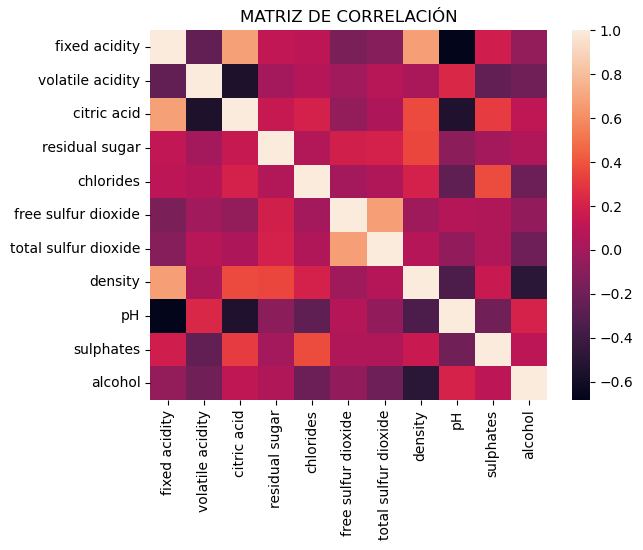

In [154]:
#Matriz de correlación
sns.heatmap(corr)
plt.title("MATRIZ DE CORRELACIÓN")
plt.show()

In [158]:
# Dividir el dataset en Train y Test 
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=10)

In [160]:
#Creación arbol de decisión
tree = DecisionTreeClassifier()

In [162]:
#Entrenar arbol de decisión
arbol = tree.fit(x_train, y_train)

[Text(0.5854361143523921, 0.9722222222222222, 'x[10] <= 10.525\ngini = 0.64\nsamples = 1279\nvalue = [8.0, 44.0, 549.0, 511.0, 157.0, 10.0]'),
 Text(0.3819768572539868, 0.9166666666666666, 'x[6] <= 83.5\ngini = 0.544\nsamples = 798\nvalue = [6, 28, 466, 267, 30, 1]'),
 Text(0.4837064858031894, 0.9444444444444444, 'True  '),
 Text(0.17546674445740956, 0.8611111111111112, 'x[9] <= 0.525\ngini = 0.58\nsamples = 638\nvalue = [6.0, 26.0, 332.0, 243.0, 30.0, 1.0]'),
 Text(0.03490859587709062, 0.8055555555555556, 'x[10] <= 9.075\ngini = 0.421\nsamples = 131\nvalue = [2, 13, 97, 19, 0, 0]'),
 Text(0.020614546868922598, 0.75, 'x[7] <= 0.998\ngini = 0.56\nsamples = 5\nvalue = [0, 3, 1, 1, 0, 0]'),
 Text(0.01750291715285881, 0.6944444444444444, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(0.023726176584986387, 0.6944444444444444, 'x[6] <= 48.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 1, 0, 0]'),
 Text(0.020614546868922598, 0.6388888888888888, 'gini = 0.0\nsamples = 1\nvalue = 

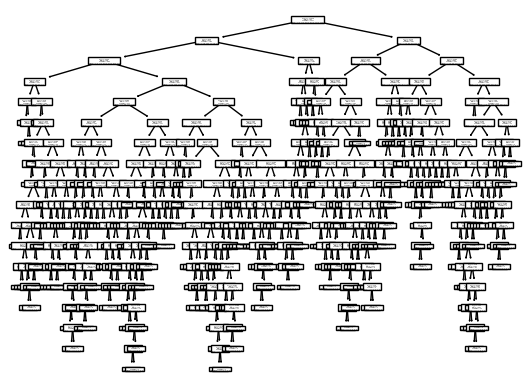

In [168]:
#Graficar los datos
plot_tree(arbol)

In [170]:
#Predicciones
predicciones = arbol.predict(x_test)

In [172]:
predicciones

array([6, 5, 6, 6, 6, 7, 4, 6, 3, 5, 7, 3, 5, 5, 6, 5, 5, 6, 6, 5, 5, 7,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 7, 5, 6, 5, 6, 6, 5, 6,
       5, 4, 7, 7, 7, 6, 5, 7, 6, 7, 6, 7, 6, 5, 5, 4, 6, 5, 7, 6, 6, 5,
       6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 7, 7, 5, 7, 5, 6, 5, 6, 5,
       5, 5, 7, 6, 7, 6, 5, 4, 5, 6, 5, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5,
       5, 7, 7, 5, 5, 5, 4, 5, 6, 6, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 6, 5,
       6, 4, 6, 6, 7, 5, 5, 7, 6, 6, 7, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 7,
       5, 5, 5, 5, 5, 7, 6, 6, 8, 5, 6, 7, 6, 7, 7, 5, 5, 5, 6, 6, 6, 6,
       5, 6, 5, 4, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 6, 5, 5, 5,
       7, 6, 7, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 4, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 7, 7, 7, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 4, 6, 5, 5, 6, 5, 6, 6, 6, 6, 4, 5,
       6, 6, 5, 5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 6,

In [178]:
# Matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,2,0,0,0,0
4,1,1,4,3,0,0
5,1,3,101,24,3,0
6,0,3,30,76,17,1
7,0,2,7,13,20,0
8,0,0,0,4,4,0


In [180]:
#Evaluación modelo de predicción
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.61875

In [182]:
#Medir la precision
precision = precision_score(y_test, predicciones, average= "weighted")
precision

0.6069679630815193

In [184]:
#Medir la capacidad del modelo
recall = recall_score(y_test, predicciones, average= "weighted")
recall

0.61875

In [186]:
#Balance entre precisión y sensibilidad
f1 = f1_score(y_test, predicciones, average= "weighted")
f1

0.6121956202747346